# Tesla (TSLA) Stock Price prediction using Facebook Prophet

## Importing all the necessary Libraries

In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet


In [ ]:
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df=pd.read_csv("TSLA.csv")

In [ ]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
1,2023-01-10,121.070000,122.760002,114.919998,118.849998,118.849998,167642500
2,2023-01-11,122.089996,125.949997,120.510002,123.220001,123.220001,183810800
3,2023-01-12,122.559998,124.129997,117.000000,123.559998,123.559998,169400900
4,2023-01-13,116.550003,122.629997,115.599998,122.400002,122.400002,180714100
...,...,...,...,...,...,...,...
245,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300
246,2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
247,2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600
248,2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,219.195360,223.712560,214.803240,219.543840,219.543840,1.358425e+08
std,40.132571,40.301589,39.633114,39.754217,39.754217,3.497193e+07
min,116.550003,122.629997,114.919998,118.849998,118.849998,6.512520e+07
25%,187.194996,192.510003,184.712498,188.420002,188.420002,1.111849e+08
50%,227.029999,233.050003,223.104996,227.819999,227.819999,1.272696e+08
75%,251.787495,257.992500,247.394993,253.019993,253.019993,1.539928e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.box(df,y="Close")

# Understanding Facebook Prophet

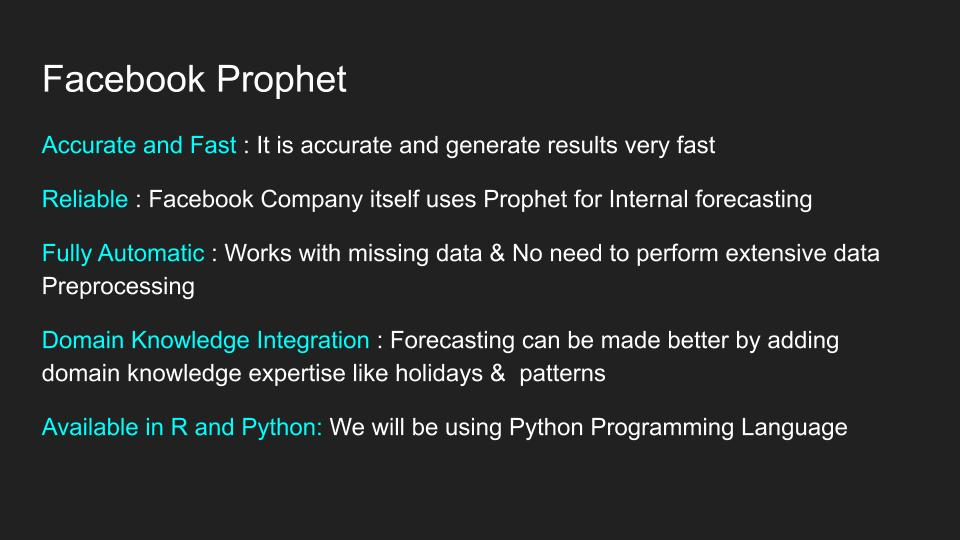

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
1,2023-01-10,121.070000,122.760002,114.919998,118.849998,118.849998,167642500
2,2023-01-11,122.089996,125.949997,120.510002,123.220001,123.220001,183810800
3,2023-01-12,122.559998,124.129997,117.000000,123.559998,123.559998,169400900
4,2023-01-13,116.550003,122.629997,115.599998,122.400002,122.400002,180714100
...,...,...,...,...,...,...,...
245,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300
246,2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
247,2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600
248,2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300


In [ ]:
columns=["Date","Close"]
ndf=pd.DataFrame(df,columns=columns)

In [ ]:
ndf

,Date,Close
0,2023-01-09,119.769997
1,2023-01-10,118.849998
2,2023-01-11,123.220001
3,2023-01-12,123.559998
4,2023-01-13,122.400002
...,...,...
245,2023-12-29,248.479996
246,2024-01-02,248.419998
247,2024-01-03,238.449997
248,2024-01-04,237.929993


In [ ]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2023-01-09,119.769997
1,2023-01-10,118.849998
2,2023-01-11,123.220001
3,2023-01-12,123.559998
4,2023-01-13,122.400002
...,...,...
245,2023-12-29,248.479996
246,2024-01-02,248.419998
247,2024-01-03,238.449997
248,2024-01-04,237.929993


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp17jtfe1p/gsc9ksaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp17jtfe1p/enuifft6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65986', 'data', 'file=/tmp/tmp17jtfe1p/gsc9ksaj.json', 'init=/tmp/tmp17jtfe1p/enuifft6.json', 'output', 'file=/tmp/tmp17jtfe1p/prophet_modelh9gelvap/prophet_model-20240112014757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:47:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-09,148.960983,125.837567,181.674236,148.960983,148.960983,4.858816,4.858816,4.858816,4.858816,4.858816,4.858816,0.0,0.0,0.0,153.819799
1,2023-01-10,149.363839,128.215573,185.633642,149.363839,149.363839,6.952790,6.952790,6.952790,6.952790,6.952790,6.952790,0.0,0.0,0.0,156.316629
2,2023-01-11,149.766695,126.035884,184.162597,149.766695,149.766695,6.403557,6.403557,6.403557,6.403557,6.403557,6.403557,0.0,0.0,0.0,156.170252
3,2023-01-12,150.169551,128.617143,182.111303,150.169551,150.169551,5.389366,5.389366,5.389366,5.389366,5.389366,5.389366,0.0,0.0,0.0,155.558916
4,2023-01-13,150.572406,127.190463,184.609912,150.572406,150.572406,5.867531,5.867531,5.867531,5.867531,5.867531,5.867531,0.0,0.0,0.0,156.439937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2024-01-31,228.932174,206.027113,263.084596,227.812465,230.267793,6.403557,6.403557,6.403557,6.403557,6.403557,6.403557,0.0,0.0,0.0,235.335731
276,2024-02-01,228.841502,205.429463,264.373228,227.664425,230.269385,5.389366,5.389366,5.389366,5.389366,5.389366,5.389366,0.0,0.0,0.0,234.230868
277,2024-02-02,228.750830,205.691442,265.009032,227.502002,230.294128,5.867531,5.867531,5.867531,5.867531,5.867531,5.867531,0.0,0.0,0.0,234.618361
278,2024-02-03,228.660158,184.653214,240.665757,227.307137,230.314805,-14.736026,-14.736026,-14.736026,-14.736026,-14.736026,-14.736026,0.0,0.0,0.0,213.924132


In [ ]:
px.line(forecast,x='ds',y='yhat')

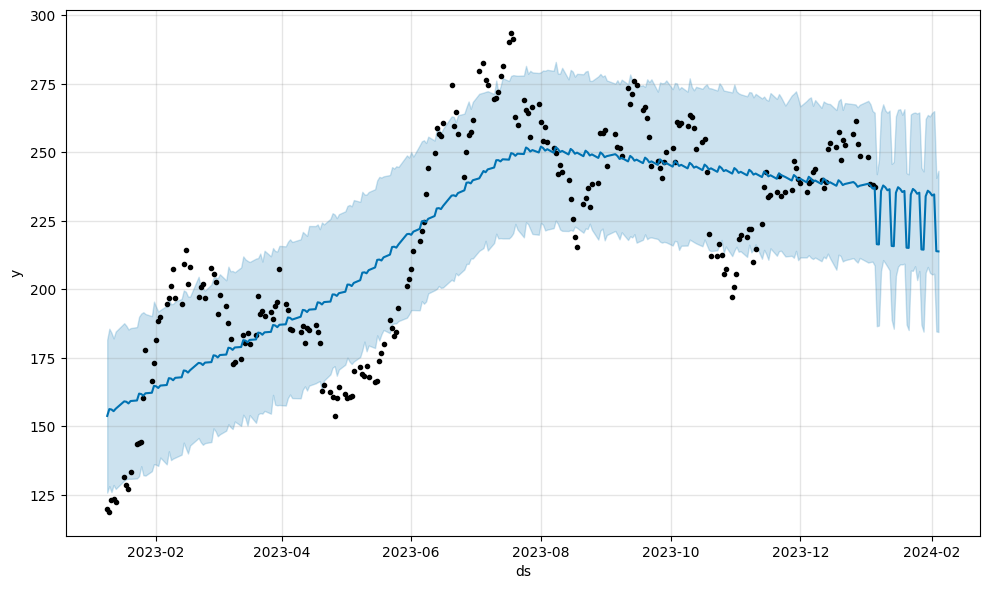

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

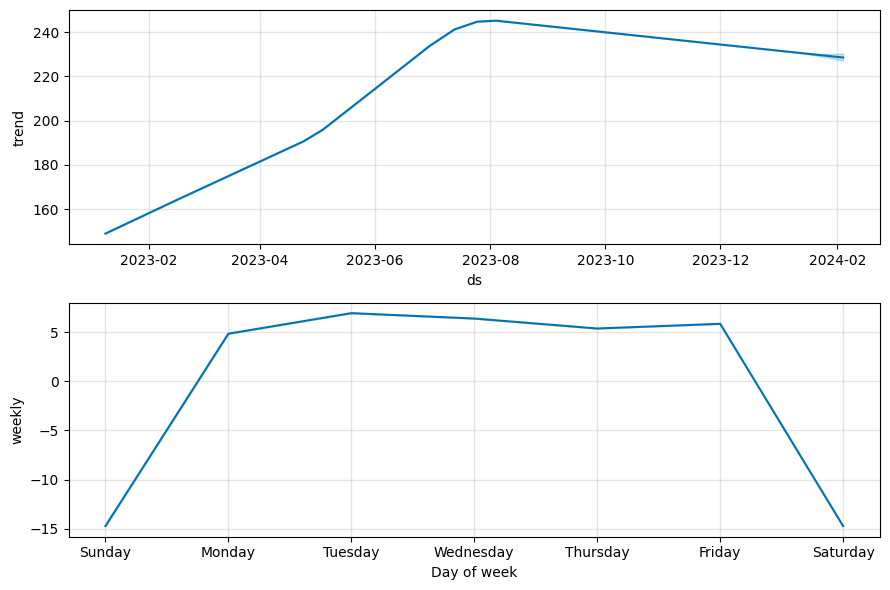

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>